In [1]:
pip install pandas matplotlib seaborn textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [5]:
df = pd.read_csv('student_feedback.csv');

In [7]:
data = {
        'Rating': [5, 4, 2, 1, 5, 3, 4],
        'Comments': [
            'Amazing event, loved the speakers!',
            'Good workshop, but the room was too small.',
            'The management was poor and disorganized.',
            'Waste of time, nothing worked.',
            'Excellent organization and great food!',
            'It was okay, could be better.',
            'Very informative sessions.'
        ]
    }
df = pd.DataFrame(data)

In [8]:
def get_sentiment(text):
    analysis = TextBlob(str(text))
    # polarity is between -1 (negative) and 1 (positive)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment'] = df['Comments'].apply(get_sentiment)

In [9]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

C:\Users\Vijay\AppData\Local\Temp\ipykernel_11108\3178857731.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


Text(0.5, 1.0, 'Distribution of Event Ratings')

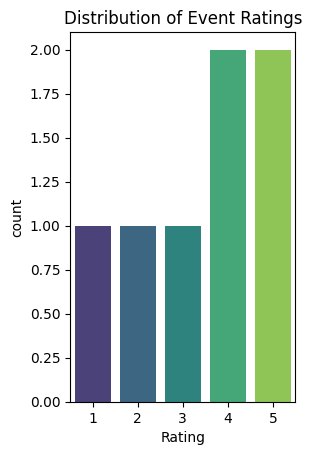

In [10]:
plt.subplot(1, 2, 1)
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Event Ratings')

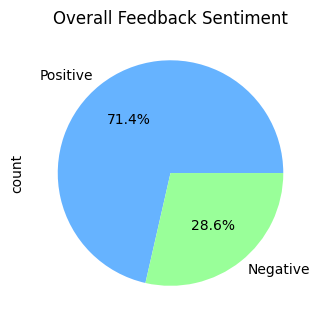

In [11]:
plt.subplot(1, 2, 2)
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Overall Feedback Sentiment')

plt.tight_layout()
plt.show()

In [12]:
print("--- Project Insights ---")
avg_rating = df['Rating'].mean()
print(f"Average Event Rating: {avg_rating:.2f}/5")
print("\nSentiment Count:")
print(df['Sentiment'].value_counts())

--- Project Insights ---
Average Event Rating: 3.43/5

Sentiment Count:
Sentiment
Positive    5
Negative    2
Name: count, dtype: int64
